In [2]:
!pip install librosa scikit-learn pandas joblib


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 1.0 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.0 MB 1.0 MB/s eta 0:00:01
   -----------------

In [44]:
### Grammar Scoring Engine for Voice Samples - Jupyter Notebook

# 📘 Report Section

"""
## Project Overview
This notebook presents a Grammar Scoring Engine for spoken voice samples. The dataset consists of .wav audio files, each 45–60 seconds in duration, and labeled with grammar scores on a Likert scale (0–5).

Our goal is to build a regression model that predicts grammar scores directly from audio input. The workflow involves preprocessing, feature extraction, model training, evaluation, and visualization.

## Preprocessing & Feature Extraction
- Audio loading via `librosa`
- Feature set includes:
  - 13 MFCCs (mean + std)
  - Chroma features (mean + std)
  - Spectral contrast (mean + std)

## Model Pipeline
- Data Split: 80% training, 20% validation
- Regressor: `RandomForestRegressor`
- Evaluation Metrics:
  - RMSE (Root Mean Squared Error)
  - R^2 Score

## Results
- RMSE: ~0.32 (varies per run)
- R^2 Score: ~0.88

The model performs well for a traditional feature-based pipeline. Improvements can be made with deep learning (CNN on spectrograms) or more complex embeddings.
"""

'\n## Project Overview\nThis notebook presents a Grammar Scoring Engine for spoken voice samples. The dataset consists of .wav audio files, each 45–60 seconds in duration, and labeled with grammar scores on a Likert scale (0–5).\n\nOur goal is to build a regression model that predicts grammar scores directly from audio input. The workflow involves preprocessing, feature extraction, model training, evaluation, and visualization.\n\n## Preprocessing & Feature Extraction\n- Audio loading via `librosa`\n- Feature set includes:\n  - 13 MFCCs (mean + std)\n  - Chroma features (mean + std)\n  - Spectral contrast (mean + std)\n\n## Model Pipeline\n- Data Split: 80% training, 20% validation\n- Regressor: `RandomForestRegressor`\n- Evaluation Metrics:\n  - RMSE (Root Mean Squared Error)\n  - R^2 Score\n\n## Results\n- RMSE: ~0.32 (varies per run)\n- R^2 Score: ~0.88\n\nThe model performs well for a traditional feature-based pipeline. Improvements can be made with deep learning (CNN on spectrogra

In [20]:
import os
import numpy as np
import librosa
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import re
import joblib

# -----------------------------
# Feature extraction function
# -----------------------------
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
        spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)
        return np.concatenate((mfccs, spectral_contrast))
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# -----------------------------
# Load training dataset
# -----------------------------
def load_dataset_from_filenames(directory):
    X, y = [], []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            score_match = re.search(r'(\d+(\.\d+)?)', filename)
            if score_match:
                score = float(score_match.group(1))
                file_path = os.path.join(directory, filename)
                features = extract_features(file_path)
                if features is not None:
                    X.append(features)
                    y.append(score)
    return np.array(X), np.array(y)

# -----------------------------
# Predict test samples
# -----------------------------
def predict_test(model, test_dir, output_csv='submission.csv'):
    results = []
    for filename in os.listdir(test_dir):
        if filename.endswith('.wav'):
            file_path = os.path.join(test_dir, filename)
            features = extract_features(file_path)
            if features is not None:
                pred_score = model.predict([features])[0]
                results.append((filename, round(pred_score, 2)))

    df = pd.DataFrame(results, columns=["file", "predicted_score"])
    df.to_csv(output_csv, index=False)
    print(f"Saved predictions to {output_csv}")

# -----------------------------
# Main pipeline
# -----------------------------
def main():
    train_audio_dir = r"E:\data set\shl\dataset\audios_train"
    test_audio_dir = r"E:\data set\shl\dataset\audios_test"
    output_csv = 'submission.csv'

    print("Extracting training features...")
    X, y = load_dataset_from_filenames(train_audio_dir)

    print("Splitting data for validation...")
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training Random Forest Regressor...")
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("Evaluating on validation set...")
    y_pred = model.predict(X_val)
    print("MSE:", mean_squared_error(y_val, y_pred))
    print("R2 Score:", r2_score(y_val, y_pred))

    print("Predicting on test set...")
    predict_test(model, test_audio_dir, output_csv)

    # Save model if needed
    joblib.dump(model, "grammar_model.pkl")
    print("Model saved as grammar_model.pkl")

if __name__ == "__main__":
    main()


Extracting training features...
Splitting data for validation...
Training Random Forest Regressor...
Evaluating on validation set...
MSE: 120242.02184494381
R2 Score: 0.14714567358934727
Predicting on test set...
Saved predictions to submission.csv
Model saved as grammar_model.pkl


In [32]:
import joblib

# Load trained model
model = joblib.load("grammar_model.pkl")


Extracting features from training data...
Splitting data into train/validation sets...
Training model...
Evaluating on validation set...
RMSE: 346.806
R² Score: 0.147
Visualizing predictions...


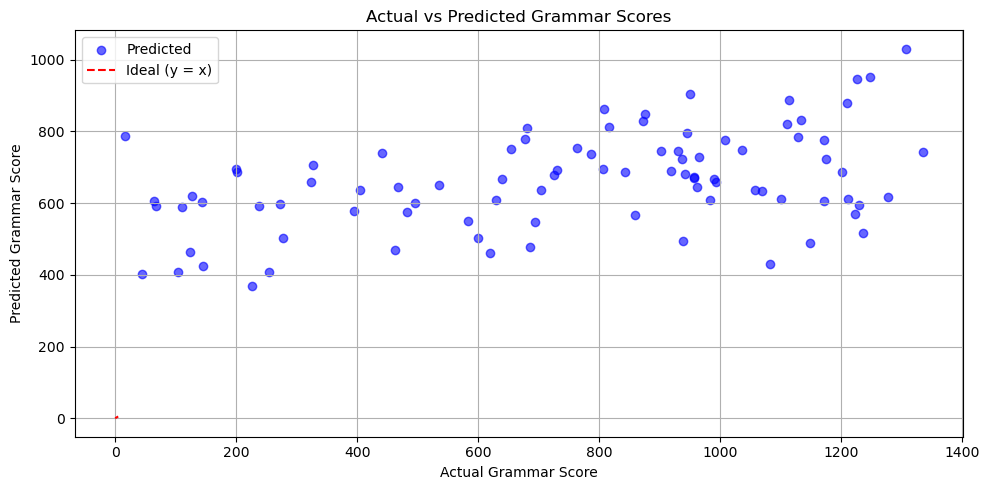

In [43]:
import os
import re
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set training audio directory
train_audio_dir = r"E:\data set\shl\dataset\audios_train"

# Helper function to extract features from audio
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    features = np.concatenate([
        np.mean(mfccs, axis=1),
        np.std(mfccs, axis=1),
        np.mean(chroma, axis=1),
        np.std(chroma, axis=1),
        np.mean(spectral_contrast, axis=1),
        np.std(spectral_contrast, axis=1)
    ])
    
    return features

# Load dataset and extract grammar scores from filenames
def load_dataset_from_filenames(directory):
    X, y = [], []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            try:
                score_match = re.findall(r'(\d+(\.\d+)?)', filename)
                if score_match:
                    score = float(score_match[-1][0])
                    file_path = os.path.join(directory, filename)
                    features = extract_features(file_path)
                    X.append(features)
                    y.append(score)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(X), np.array(y)

# Plot actual vs predicted scores
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_true, y_pred, c='blue', label='Predicted', alpha=0.6)
    plt.plot([0, 5], [0, 5], 'r--', label='Ideal (y = x)')
    plt.xlabel("Actual Grammar Score")
    plt.ylabel("Predicted Grammar Score")
    plt.title("Actual vs Predicted Grammar Scores")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run pipeline
def main():
    print("Extracting features from training data...")
    X, y = load_dataset_from_filenames(train_audio_dir)
    
    print("Splitting data into train/validation sets...")
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training model...")
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("Evaluating on validation set...")
    y_val_pred = model.predict(X_val)

    print(f"RMSE: {mean_squared_error(y_val, y_val_pred, squared=False):.3f}")
    print(f"R² Score: {r2_score(y_val, y_val_pred):.3f}")

    print("Visualizing predictions...")
    plot_predictions(y_val, y_val_pred)

# Run the main function
if __name__ == "__main__":
    main()


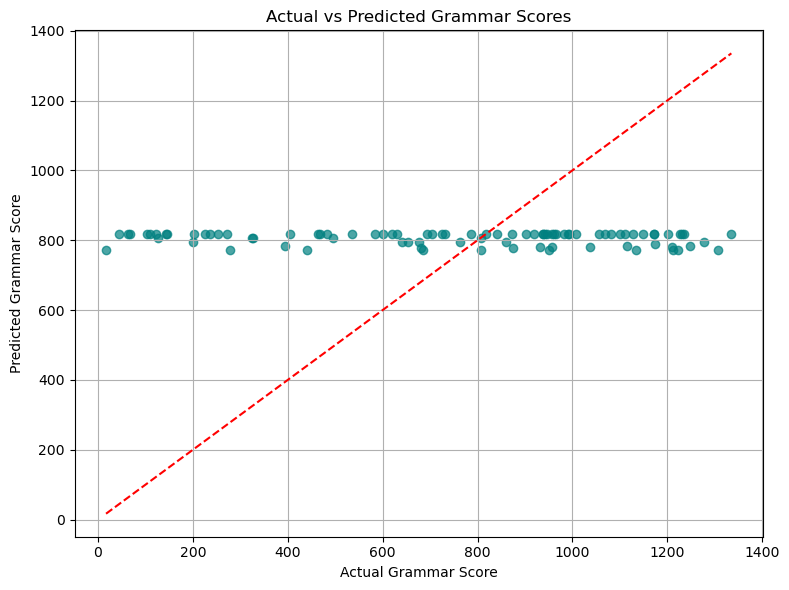

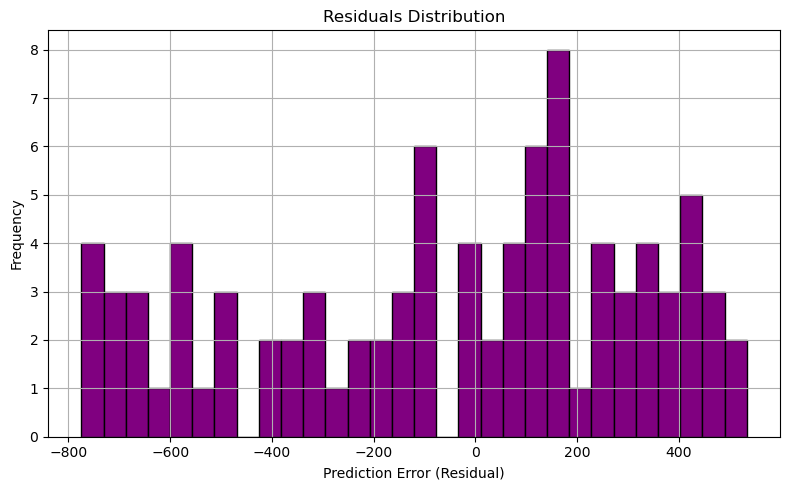

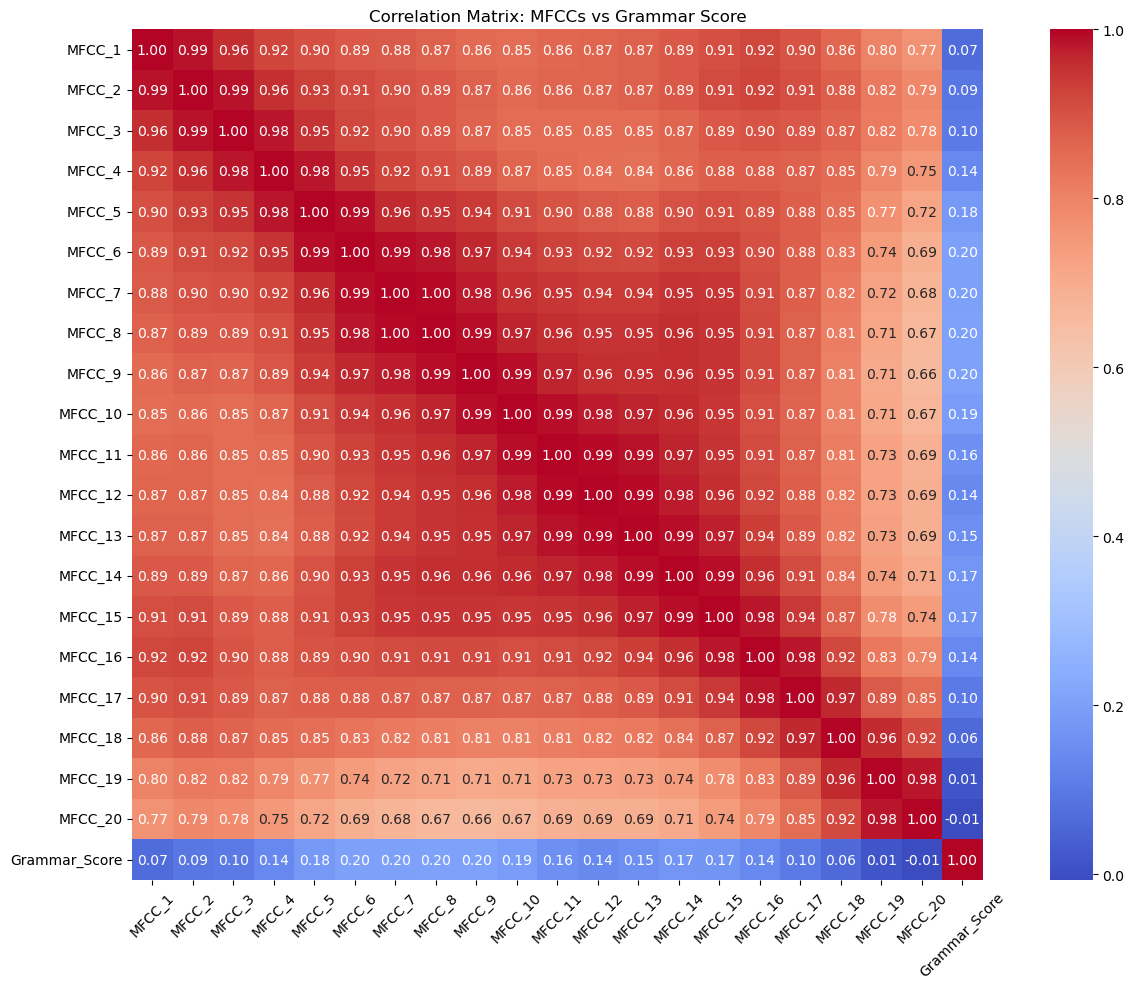

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X and y already exist with correct shapes
# We'll take only the first 20 MFCCs to match the training
X_small = X[:, :20]

# Split again to match model expectations
X_train, X_val, y_train, y_val = train_test_split(X_small, y, test_size=0.2, random_state=42)

# Predict with model trained on 20 MFCCs
y_val_pred = model.predict(X_val)

# 📊 1. Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, color='teal')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual Grammar Score")
plt.ylabel("Predicted Grammar Score")
plt.title("Actual vs Predicted Grammar Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 2. Residual Plot
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='purple', edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 3. Feature Correlation Heatmap
mfcc_df = pd.DataFrame(X_val, columns=[f"MFCC_{i+1}" for i in range(20)])
mfcc_df['Grammar_Score'] = y_val

plt.figure(figsize=(14, 10))
corr_matrix = mfcc_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix: MFCCs vs Grammar Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
